In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [118]:
# Emulation settings
GRID_SIZE = (16, 24) # Y, X

# Points
POINT_A = (8, 6) # Y, X
POINT_B = (0, 12) # Y, X

# Create grid
grid = np.zeros([GRID_SIZE[0], GRID_SIZE[1]])

# Reset grid
def reset_grid(grid):
    grid = np.zeros([GRID_SIZE[0], GRID_SIZE[1]])
    return grid

# Plot grid in photos app
def show_grid(grid):
    # Convert grid to image
    grid_view = Image.fromarray(grid)
    
    # Display image
    grid_view.show()

# Draw line
def draw_line(grid, point_a, point_b):
    for y_cur in range(0, GRID_SIZE[0]):
        for x_cur in range(0, GRID_SIZE[1]):
            if (((y_cur, x_cur) == point_a) or ((y_cur, x_cur) == point_b)):
                grid[y_cur, x_cur] = 5
            else:
                # Store distances
                dist_cur = GRID_SIZE[0]
                dist_up = GRID_SIZE[0]
                dist_down = GRID_SIZE[0]
                
                # Calculate distances
                dist_up = cross_product(point_a, (y_cur - 1, x_cur), point_b)
                dist_cur = cross_product(point_a, (y_cur, x_cur), point_b)
                dist_down = cross_product(point_a, (y_cur + 1, x_cur), point_b)
                    
                # Determine whether to draw
                exact = (dist_cur == 0)
                sign_mismatch = (np.sign(dist_up) != np.sign(dist_cur)) \
                             or (np.sign(dist_up) != np.sign(dist_down)) \
                             or (np.sign(dist_down) != np.sign(dist_down))
                closest = (np.abs(dist_cur) <= np.abs(dist_up)) and (np.abs(dist_cur) <= np.abs(dist_down))
                final = exact or (sign_mismatch and closest)
                
                # Draw if needed
                if final and (between(point_a, (y_cur, x_cur), point_b)):
                    grid[y_cur, x_cur] = 4

def cross_product(p1, p2, p3):
    return (p1[1] - p3[1]) * (p3[0] - p2[0]) - (p1[0] - p3[0]) * (p3[1] - p2[1])

def between(p1, p2, p3):
    return (((p1[0] <= p2[0]) and (p2[0] <=p3[0])) or ((p1[0] >= p2[0]) and (p2[0] >= p3[0]))) \
       and (((p1[1] <= p2[1]) and (p2[1] <=p3[1])) or ((p1[1] >= p2[1]) and (p2[1] >= p3[1])))

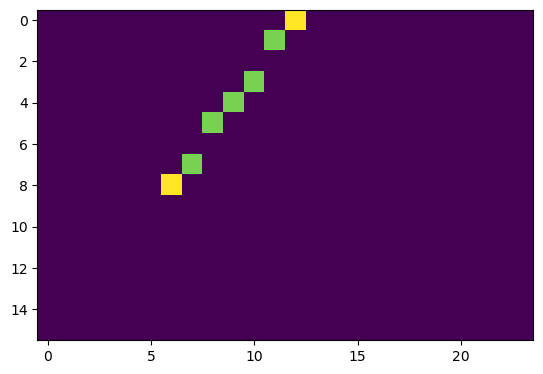

In [119]:
reset_grid(grid)
draw_line(grid, POINT_A, POINT_B)
plt.imshow(grid)


In [41]:
cross_product((5, 1), (5, 3), (2, 6))

6